In [2]:
import pandas as pd

In [4]:
data=pd.read_csv('Measurement_info.csv')
data1=pd.read_csv('Measurement_item_info.csv')
data2=pd.read_csv('Measurement_station_info.csv')
data3=pd.read_csv('Measurement_summary.csv')

In [5]:
df=data3

In [7]:
df.shape

(647511, 11)

In [9]:
df.isnull().values.sum()

0

In [11]:
df.describe()

,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
count,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000
mean,113.000221,37.553484,126.989340,-0.001795,0.022519,0.017979,0.509197,43.708051,25.411995
std,7.211315,0.053273,0.078790,0.078832,0.115153,0.099308,0.405319,71.137342,43.924595
min,101.000000,37.452357,126.835151,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,107.000000,37.517528,126.927102,0.003000,0.016000,0.008000,0.300000,22.000000,11.000000
50%,113.000000,37.544962,127.004850,0.004000,0.025000,0.021000,0.500000,35.000000,19.000000
75%,119.000000,37.584848,127.047470,0.005000,0.038000,0.034000,0.600000,53.000000,31.000000
max,125.000000,37.658774,127.136792,3.736000,38.445000,33.600000,71.700000,3586.000000,6256.000000


In [17]:
df.describe(include=['O'])

,Measurement date,Address
count,647511,647511
unique,25906,25
top,2017-10-04 17:00,"71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re..."
freq,25,25906


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
Measurement date    647511 non-null object
Station code        647511 non-null int64
Address             647511 non-null object
Latitude            647511 non-null float64
Longitude           647511 non-null float64
SO2                 647511 non-null float64
NO2                 647511 non-null float64
O3                  647511 non-null float64
CO                  647511 non-null float64
PM10                647511 non-null float64
PM2.5               647511 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 54.3+ MB


In [19]:
df.Address.unique().tolist()

['19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republic of Korea',
 '15, Deoksugung-gil, Jung-gu, Seoul, Republic of Korea',
 '136, Hannam-daero, Yongsan-gu, Seoul, Republic of Korea',
 '215, Jinheung-ro, Eunpyeong-gu, Seoul, Republic of Korea',
 '32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul, Republic of Korea',
 '10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic of Korea',
 '18, Ttukseom-ro 3-gil, Seongdong-gu, Seoul, Republic of Korea',
 '571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republic of Korea',
 '43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul, Republic of Korea',
 '369, Yongmasan-ro, Jungnang-gu, Seoul, Republic of Korea',
 '70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Republic of Korea',
 '49, Samyang-ro 139-gil, Gangbuk-gu, Seoul, Republic of Korea',
 '34, Sirubong-ro 2-gil, Dobong-gu, Seoul, Republic of Korea',
 '17, Sanggye-ro 23-gil, Nowon-gu, Seoul, Republic of Korea',
 '56, Jungang-ro 52-gil, Yangcheon-gu, Seoul, Republic of Korea',
 '71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Republic

In [21]:
import numpy as np
print('Total Address:',len(np.unique(df.Address)))

Total Address: 25


In [67]:
PM10=df.groupby('Address').agg({'PM10':'median'}).sort_values('PM10').reset_index().tail(10)
PM10

,Address,PM10
15,"45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...",36.0
16,"6, Sadang-ro 16a-gil, Dongjak-gu, Seoul, Repub...",36.0
17,"10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...",36.0
18,"16, Sinbanpo-ro 15-gil, Seocho-gu, Seoul, Repu...",37.0
19,"14, Sillimdong-gil, Gwanak-gu, Seoul, Republic...",37.0
20,"71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...",37.0
21,"18, Ttukseom-ro 3-gil, Seongdong-gu, Seoul, Re...",38.0
22,"70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Repu...",38.0
23,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",39.0
24,"11, Yangsan-ro 23-gil, Yeongdeungpo-gu, Seoul,...",41.0


In [59]:
import seaborn as sns


In [60]:
%matplotlib inline

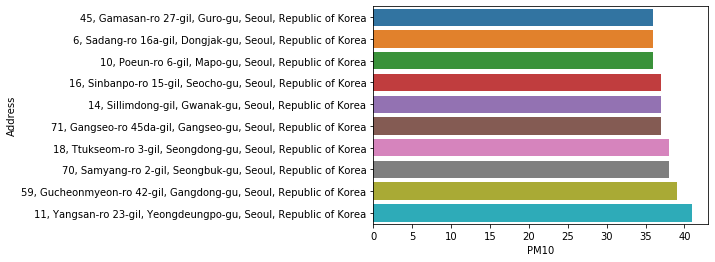

In [68]:
sns.barplot(x='PM10',y='Address',data=PM10)

In [76]:
PM2=df.groupby('Address').agg({'PM2.5':'median'}).sort_values('PM2.5').tail(10).reset_index()
PM2

,Address,PM2.5
0,"20, Geumha-ro 21-gil, Geumcheon-gu, Seoul, Rep...",20.0
1,"18, Ttukseom-ro 3-gil, Seongdong-gu, Seoul, Re...",20.0
2,"17, Sanggye-ro 23-gil, Nowon-gu, Seoul, Republ...",20.0
3,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",20.0
4,"6, Sadang-ro 16a-gil, Dongjak-gu, Seoul, Repub...",20.0
5,"215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...",20.0
6,"14, Sillimdong-gil, Gwanak-gu, Seoul, Republic...",21.0
7,"56, Jungang-ro 52-gil, Yangcheon-gu, Seoul, Re...",21.0
8,"10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...",21.0
9,"11, Yangsan-ro 23-gil, Yeongdeungpo-gu, Seoul,...",22.0


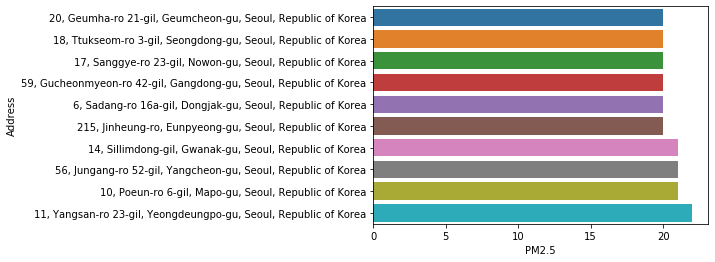

In [77]:
sns.barplot(x='PM2.5',y="Address",data=PM2)

In [87]:
SO2=df.groupby('Address').agg({'SO2':'median'}).sort_values('SO2').tail(10).reset_index()

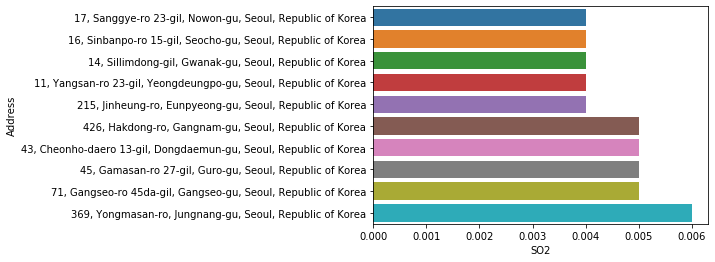

In [88]:
sns.barplot(x="SO2",y='Address',data=SO2)

In [93]:
NO2=df.groupby('Address').agg({'NO2':'median'}).sort_values('NO2').tail(10).reset_index()

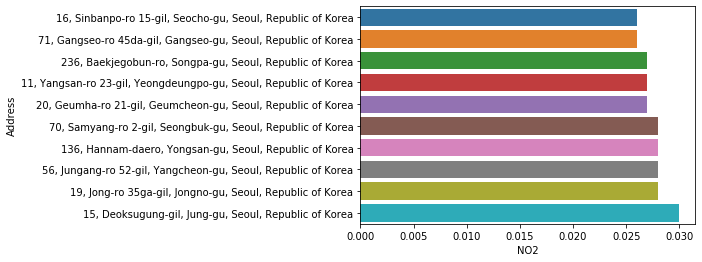

In [94]:
sns.barplot(x='NO2',y='Address',data=NO2)

In [102]:
O3=df.groupby('Address').agg({'O3':'median'}).sort_values('O3').tail(10).reset_index()

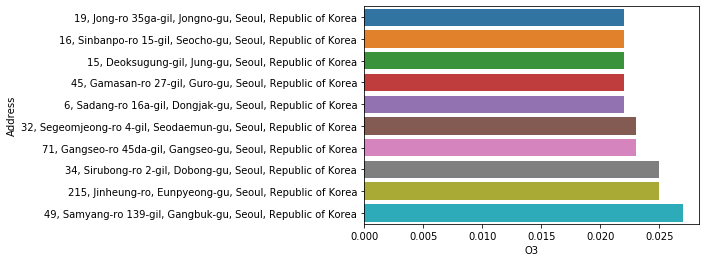

In [103]:
sns.barplot(x="O3",y='Address',data=O3)

In [108]:
CO=df.groupby("Address").agg({'CO':"median"}).sort_values('CO').tail(10).reset_index()

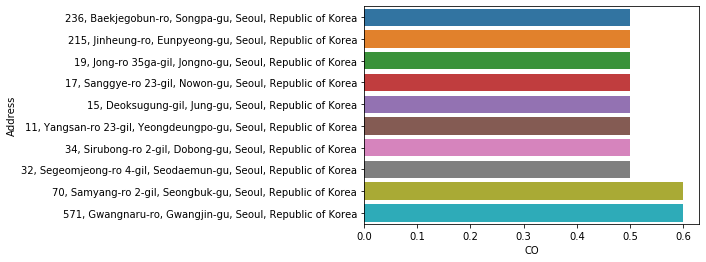

In [113]:
sns.barplot(x='CO',y="Address",data=CO)

In [117]:
top10=pd.concat([PM10,PM2,SO2,NO2,CO,O3])

C:\Users\shilpa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [132]:
top10.reset_index()
top10

,Address,CO,NO2,O3,PM10,PM2.5,SO2
15,"45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...",NaN,NaN,NaN,36.0,NaN,NaN
16,"6, Sadang-ro 16a-gil, Dongjak-gu, Seoul, Repub...",NaN,NaN,NaN,36.0,NaN,NaN
17,"10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...",NaN,NaN,NaN,36.0,NaN,NaN
18,"16, Sinbanpo-ro 15-gil, Seocho-gu, Seoul, Repu...",NaN,NaN,NaN,37.0,NaN,NaN
19,"14, Sillimdong-gil, Gwanak-gu, Seoul, Republic...",NaN,NaN,NaN,37.0,NaN,NaN
20,"71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...",NaN,NaN,NaN,37.0,NaN,NaN
21,"18, Ttukseom-ro 3-gil, Seongdong-gu, Seoul, Re...",NaN,NaN,NaN,38.0,NaN,NaN
22,"70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Repu...",NaN,NaN,NaN,38.0,NaN,NaN
23,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",NaN,NaN,NaN,39.0,NaN,NaN
24,"11, Yangsan-ro 23-gil, Yeongdeungpo-gu, Seoul,...",NaN,NaN,NaN,41.0,NaN,NaN


In [121]:
top10.groupby("Address").agg

In [145]:
top10.Address.value_counts().sort_values(ascending=False).head(10)

11, Yangsan-ro 23-gil, Yeongdeungpo-gu, Seoul, Republic of Korea    5
71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Republic of Korea       4
215, Jinheung-ro, Eunpyeong-gu, Seoul, Republic of Korea            4
16, Sinbanpo-ro 15-gil, Seocho-gu, Seoul, Republic of Korea         4
70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Republic of Korea         3
15, Deoksugung-gil, Jung-gu, Seoul, Republic of Korea               3
6, Sadang-ro 16a-gil, Dongjak-gu, Seoul, Republic of Korea          3
45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republic of Korea            3
19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republic of Korea           3
17, Sanggye-ro 23-gil, Nowon-gu, Seoul, Republic of Korea           3
Name: Address, dtype: int64